# Preparation

In [1]:
# Import primary functions
import warnings
warnings.filterwarnings("ignore")

import scipy
import sklearn
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import secondary functions
from scipy.stats import *
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Analyze source files

In [2]:
# Read source files first
df_train = pd.read_csv("/kaggle/input/playground-series-s4e5/train.csv")
df_test = pd.read_csv("/kaggle/input/playground-series-s4e5/test.csv")

# Display number of both variables
print("Train:", len(df_train))
print("Test:", len(df_test))

sample_sub = pd.read_csv("/kaggle/input/playground-series-s4e5/sample_submission.csv")

Train: 1117957
Test: 745305


In [3]:
# Show first five rows of train variables
df_train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [4]:
# Show first five rows of test variables
df_test.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


# Exploratory Data Analysis

In [5]:
# Concise summary of the train data
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [6]:
# Concise summary of the test data
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745305 entries, 0 to 745304
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   id                               745305 non-null  int64
 1   MonsoonIntensity                 745305 non-null  int64
 2   TopographyDrainage               745305 non-null  int64
 3   RiverManagement                  745305 non-null  int64
 4   Deforestation                    745305 non-null  int64
 5   Urbanization                     745305 non-null  int64
 6   ClimateChange                    745305 non-null  int64
 7   DamsQuality                      745305 non-null  int64
 8   Siltation                        745305 non-null  int64
 9   AgriculturalPractices            745305 non-null  int64
 10  Encroachments                    745305 non-null  int64
 11  IneffectiveDisasterPreparedness  745305 non-null  int64
 12  DrainageSystems               

In [7]:
# Statistical summary of the train data
df_train.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [8]:
# Statistical summary of the test data
df_test.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
count,7.453050e+05,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,...,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000
mean,1.490609e+06,4.915610,4.930288,4.960027,4.946084,4.938424,4.933524,4.958468,4.927651,4.945308,...,4.947436,4.944003,4.957209,4.927620,4.930720,4.926062,4.926957,4.948424,4.940204,4.943918
std,2.151512e+05,2.056295,2.094117,2.071722,2.052602,2.081816,2.059243,2.089312,2.068110,2.073404,...,2.081322,2.072335,2.088787,2.079006,2.083348,2.065638,2.073692,2.065891,2.079128,2.087387
min,1.117957e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.304283e+06,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,...,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
50%,1.490609e+06,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,1.676935e+06,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,1.863261e+06,16.000000,17.000000,16.000000,17.000000,17.000000,17.000000,16.000000,16.000000,16.000000,...,16.000000,17.000000,17.000000,16.000000,16.000000,17.000000,19.000000,22.000000,16.000000,16.000000


In [9]:
# Plot functions, 1st step
def plot_numerics(data):
    numeric_columns = data.columns
    
    # Plot histograms along with the box plots for each column
    for column in numeric_columns:
        _, ax = plt.subplots(1, 2, figsize=(16, 5))
        ax=ax.flatten()
    
    # Define histogram dependencies
    sns.histplot(data[column], bins=50, kde=True, color='skyblue', ax=ax[0])
    ax[0].set_title(f'Histogram of {column}', fontsize=15, fontweight='bold')
    ax[0].set_xlabel(column, fontsize=12)
    ax[0].set_ylabel('Frequency', fontsize=12)
    
    # Define box plot dependencies
    sns.boxplot(x=data[column], color='lightgreen', ax=ax[1])
    ax[1].set_title(f'Box plot of {column}', fontsize=15, fontweight='bold')
    ax[1].set_xlabel(column, fontsize=12)
    
    plt.tight_layout()
    plt.show()

# Plot functions, 2nd step
def get_count_plot(cat):
    ax=sns.countplot(x=df_train[cat], order=df_train[cat].value_counts(ascending=False).index)
    abs_values=df_train[cat].value_counts(ascending=False)
    rel_values=df_train[cat].value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
    
    ax.bar_label(container=ax.containers[0], labels=lbls)
    ax.set_title("Distribution of categorical values", fontsize=16)

<Figure size 2500x1200 with 0 Axes>

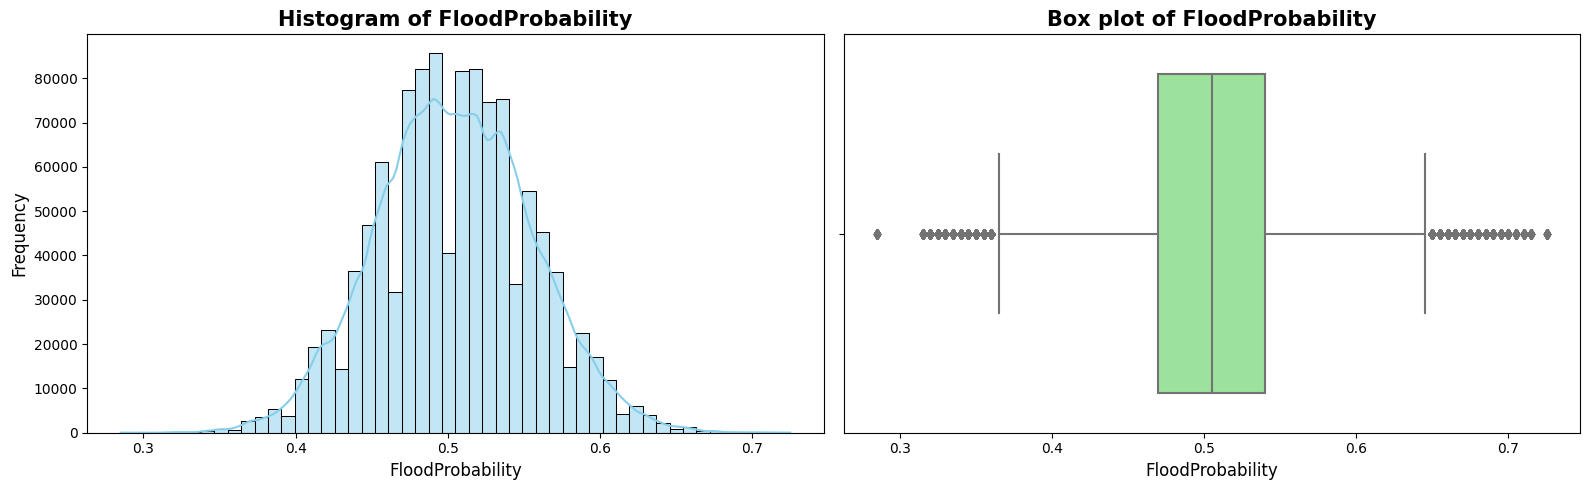

In [10]:
# Plot target values
plt.figure(figsize=(25, 12))
plot_numerics(df_train[['FloodProbability']])

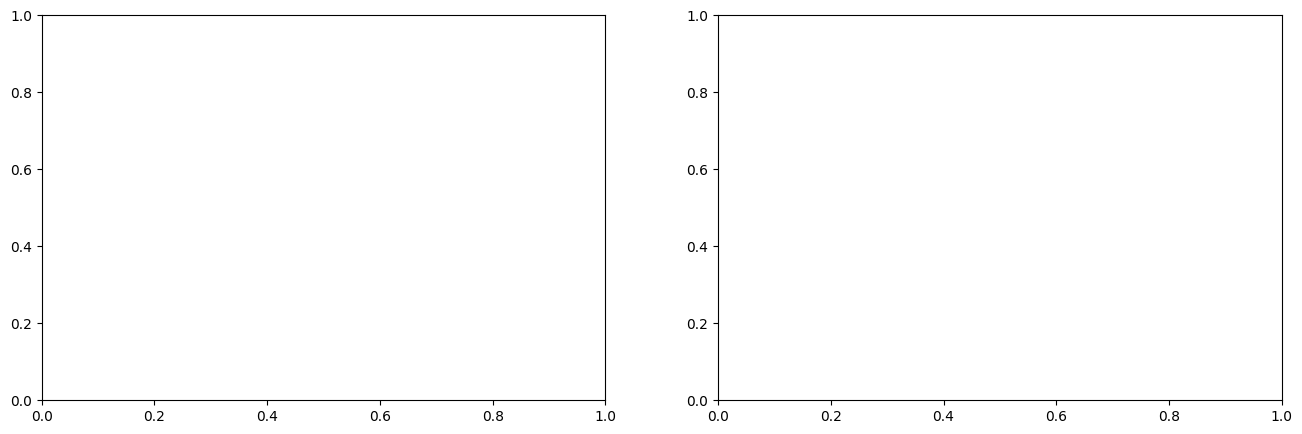

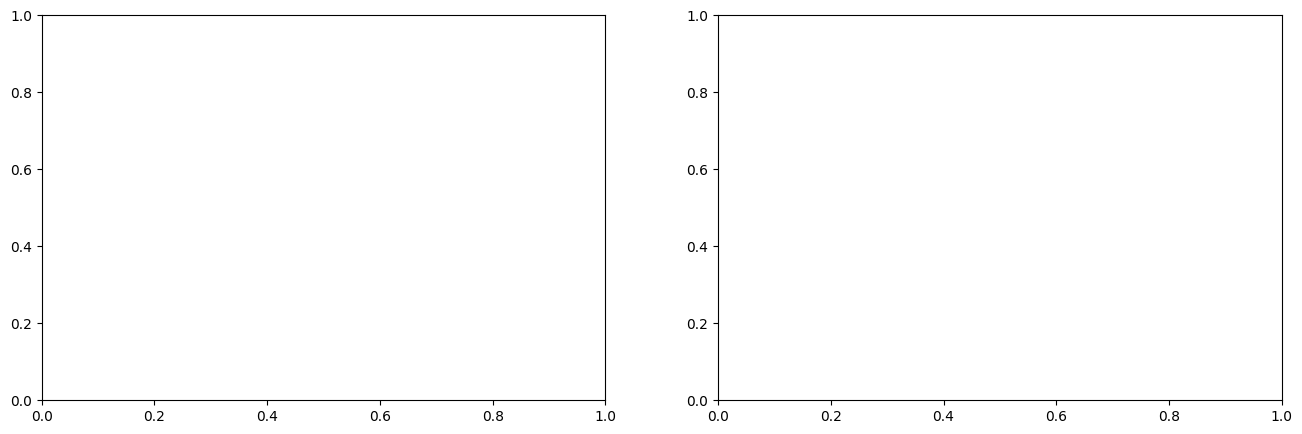

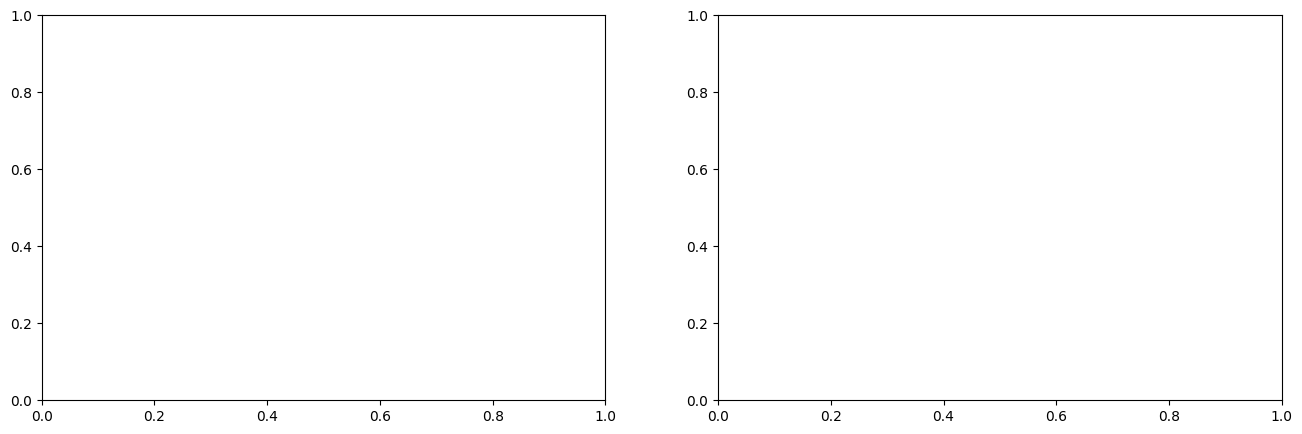

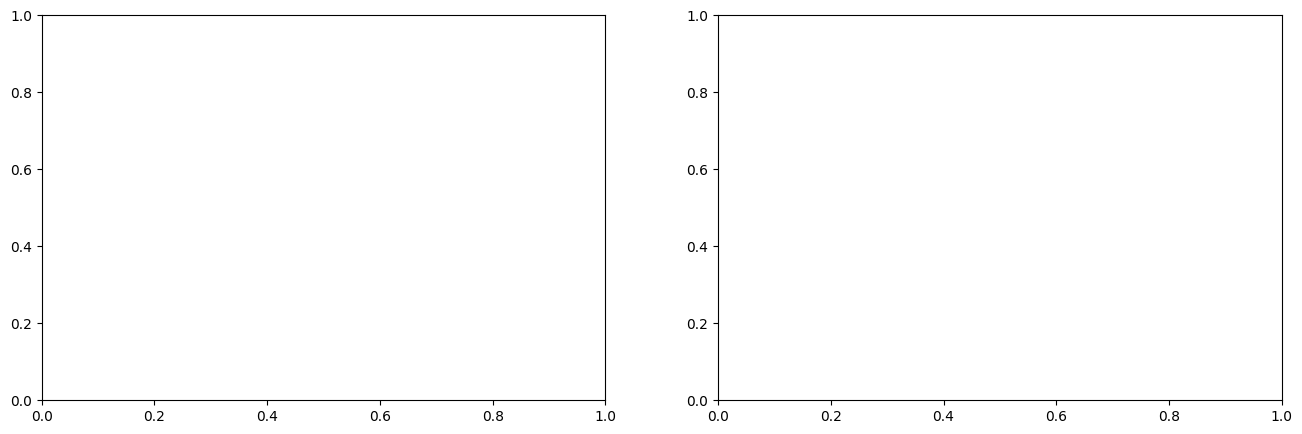

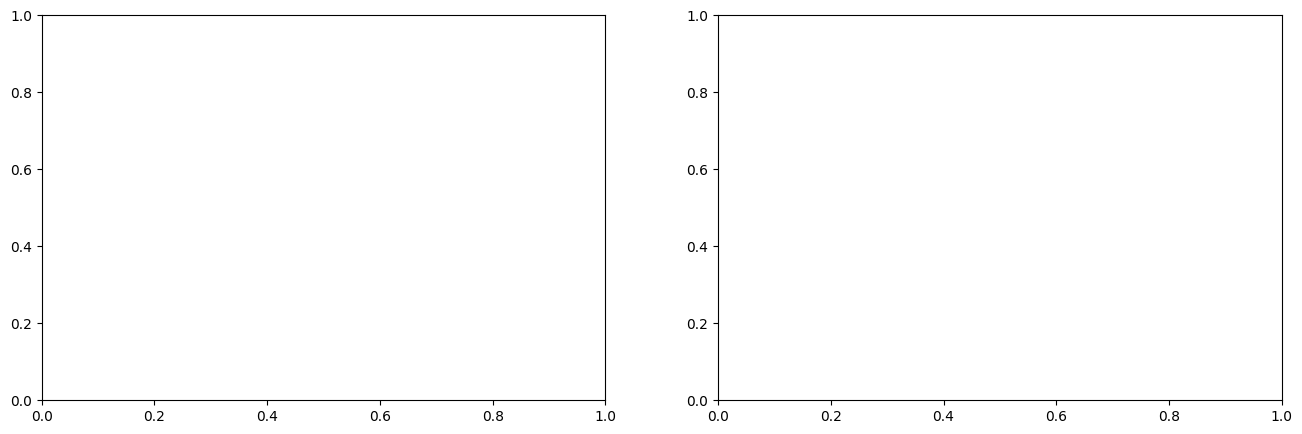

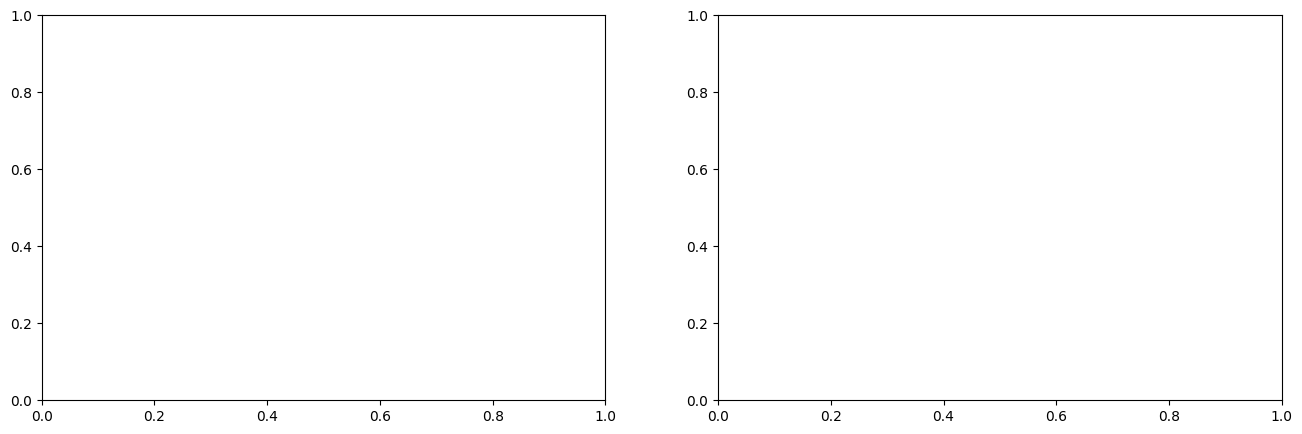

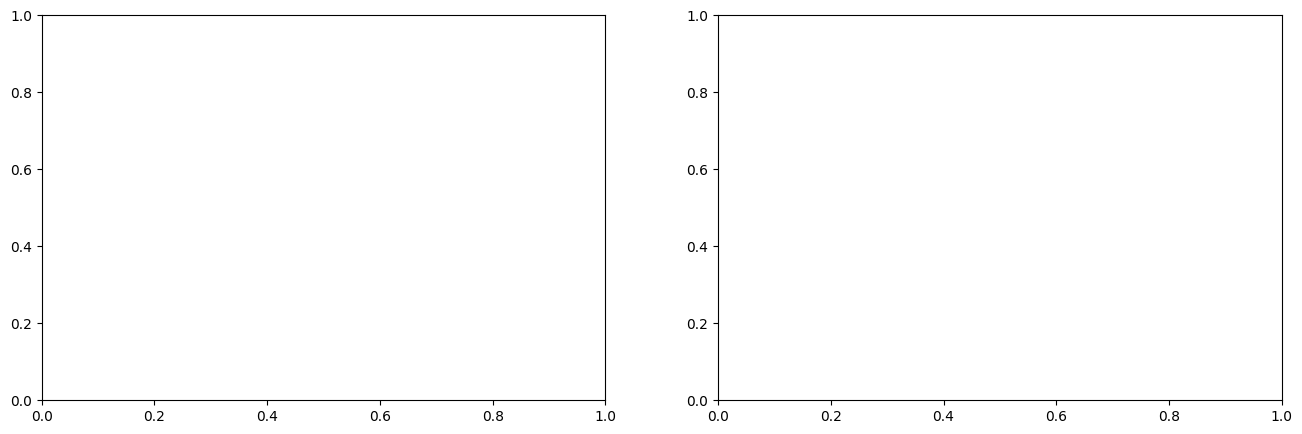

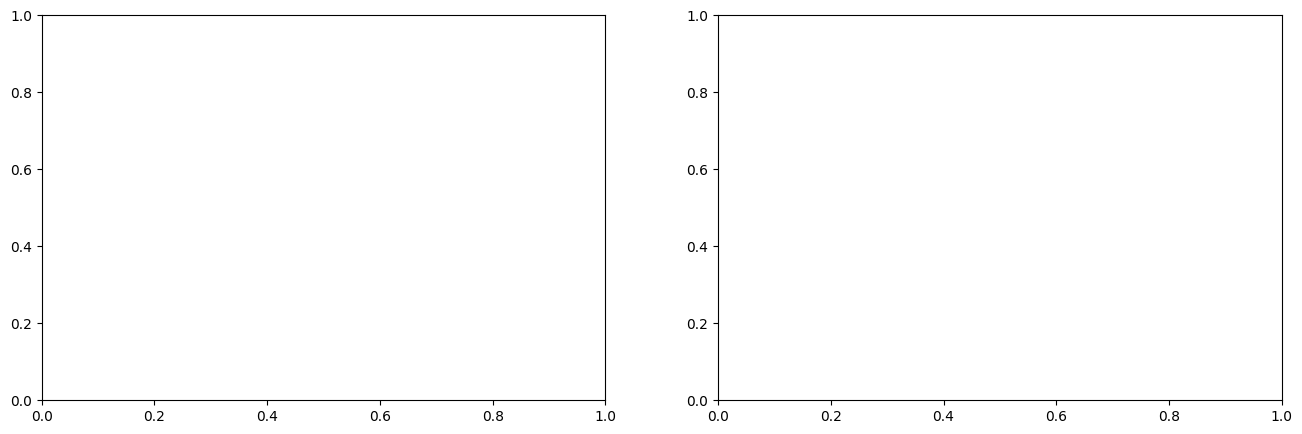

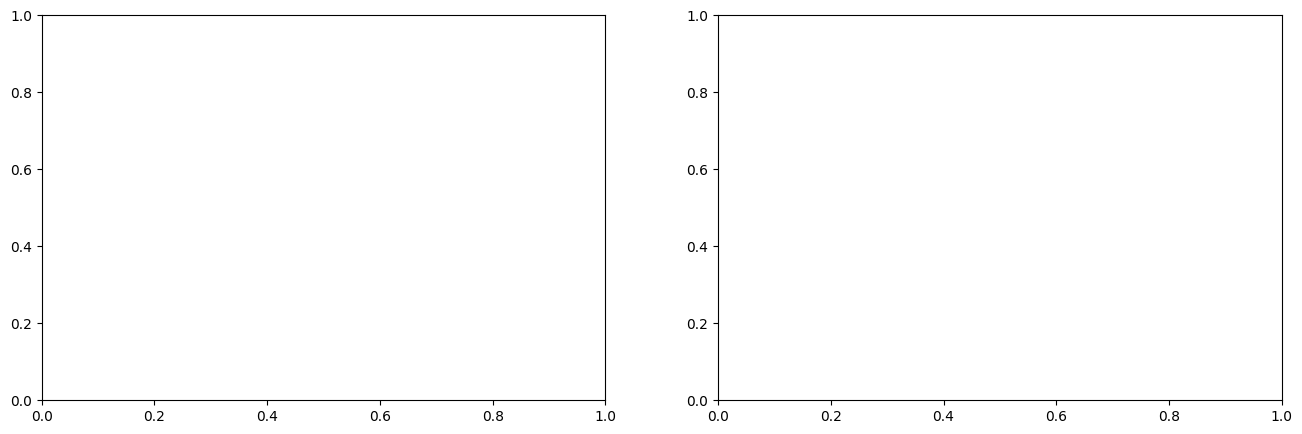

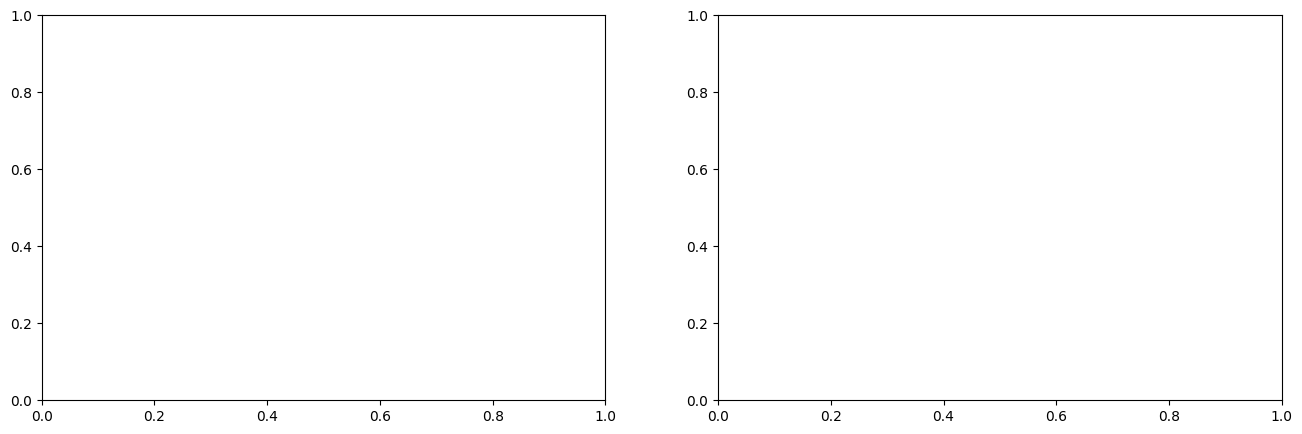

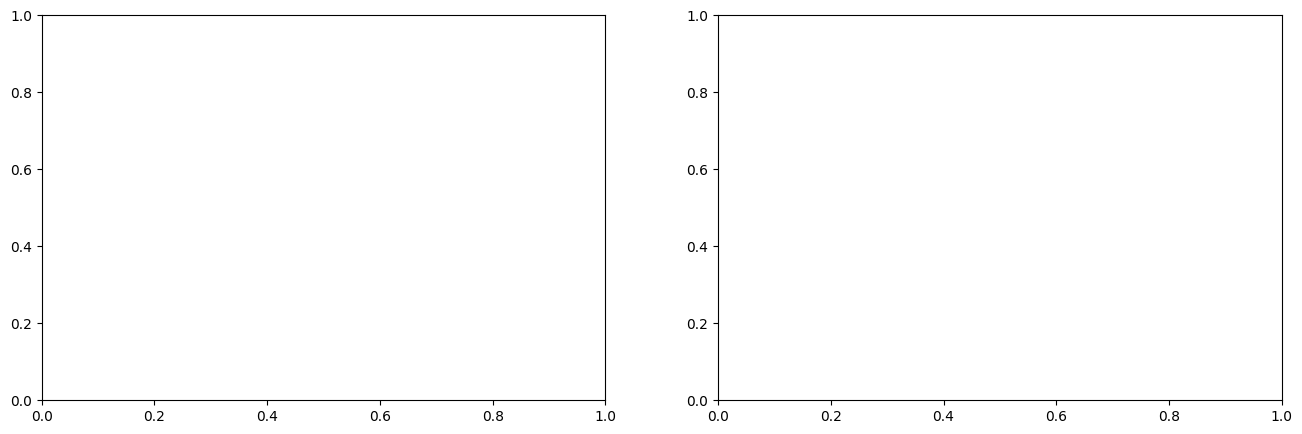

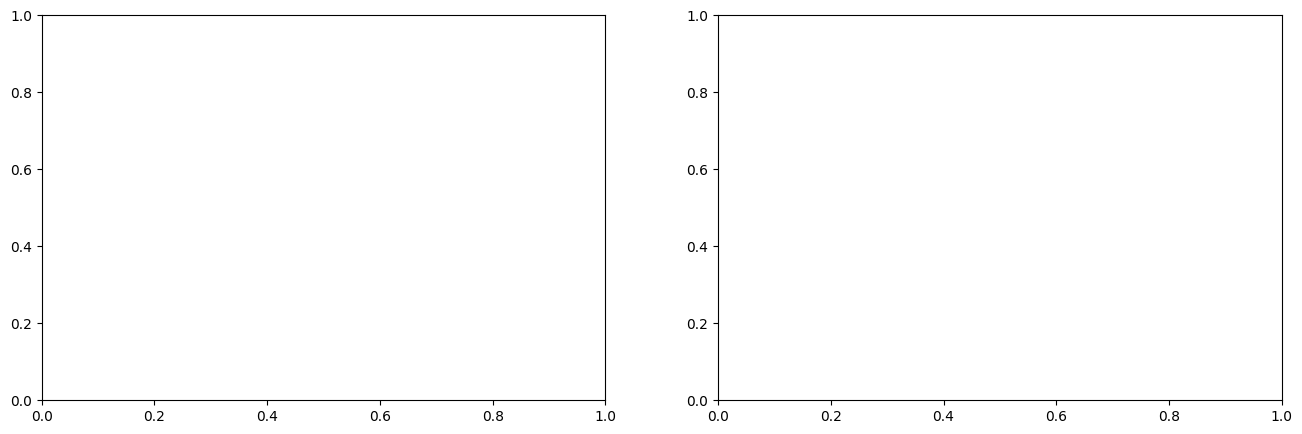

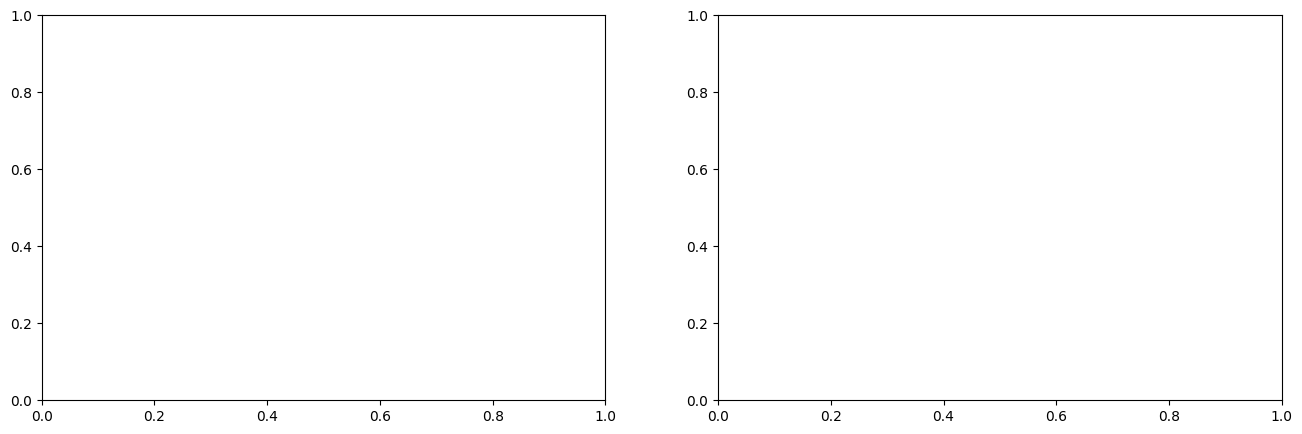

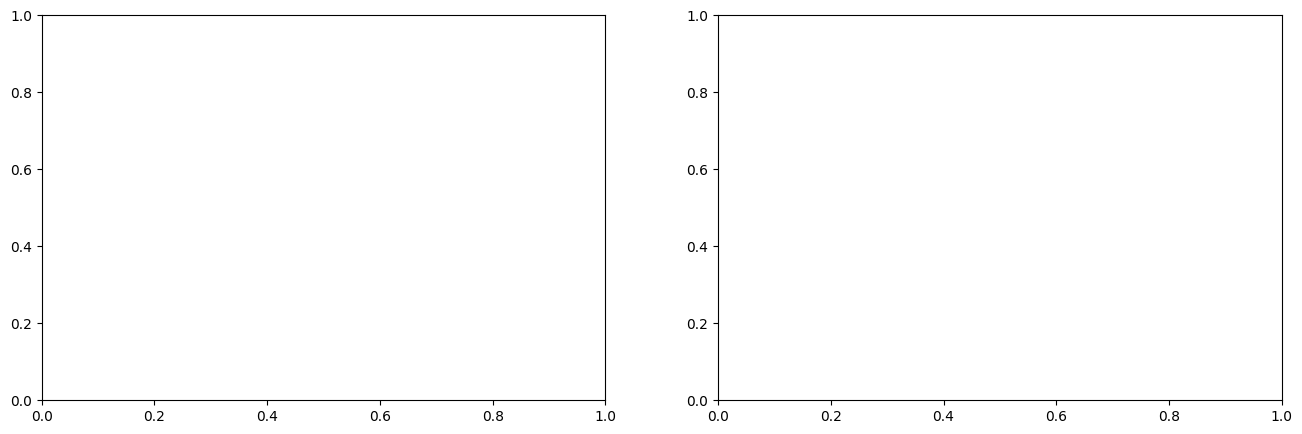

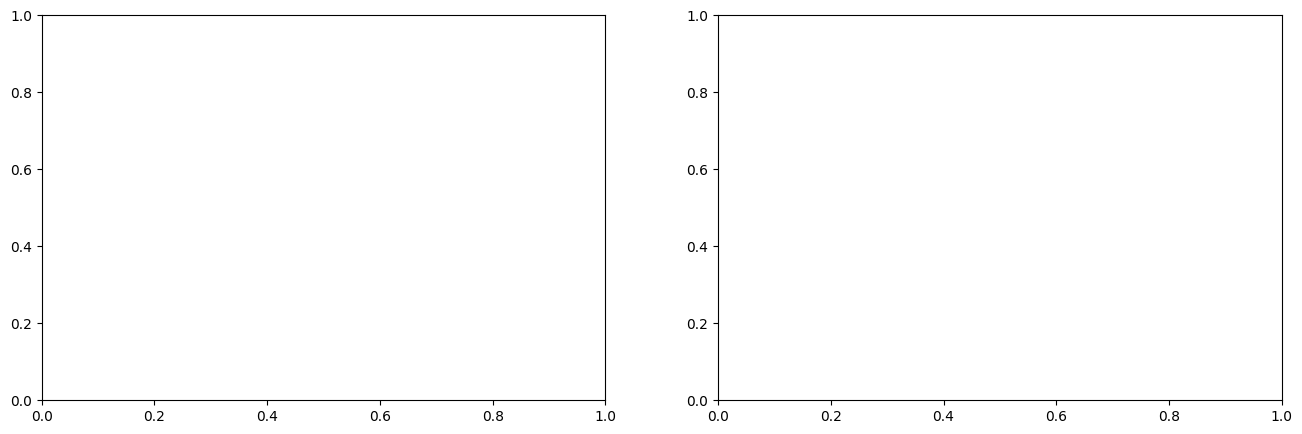

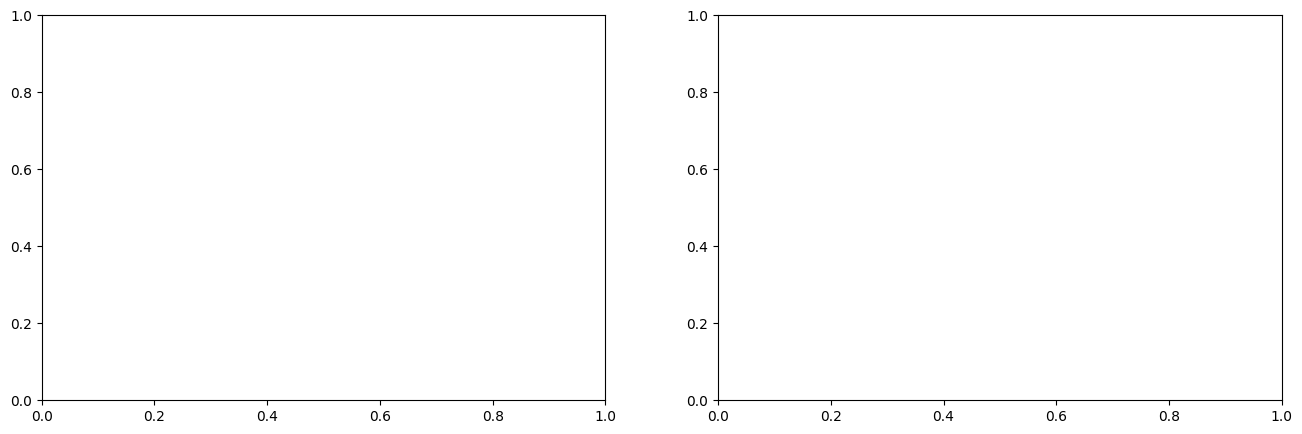

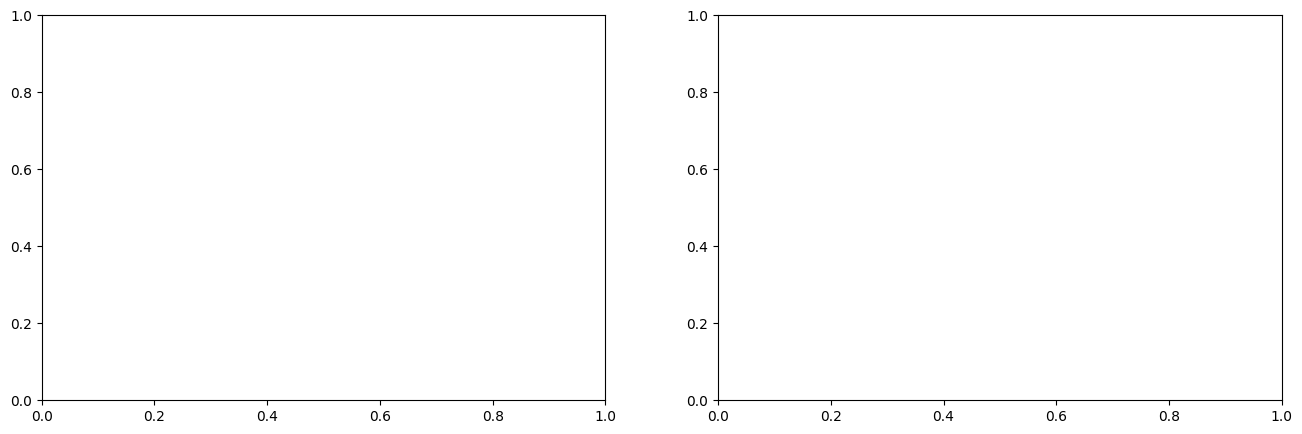

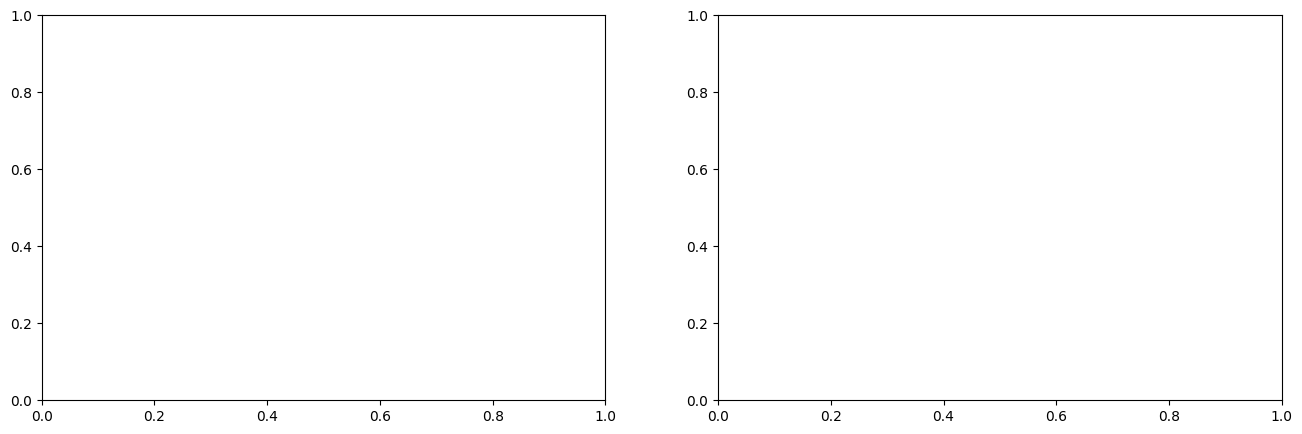

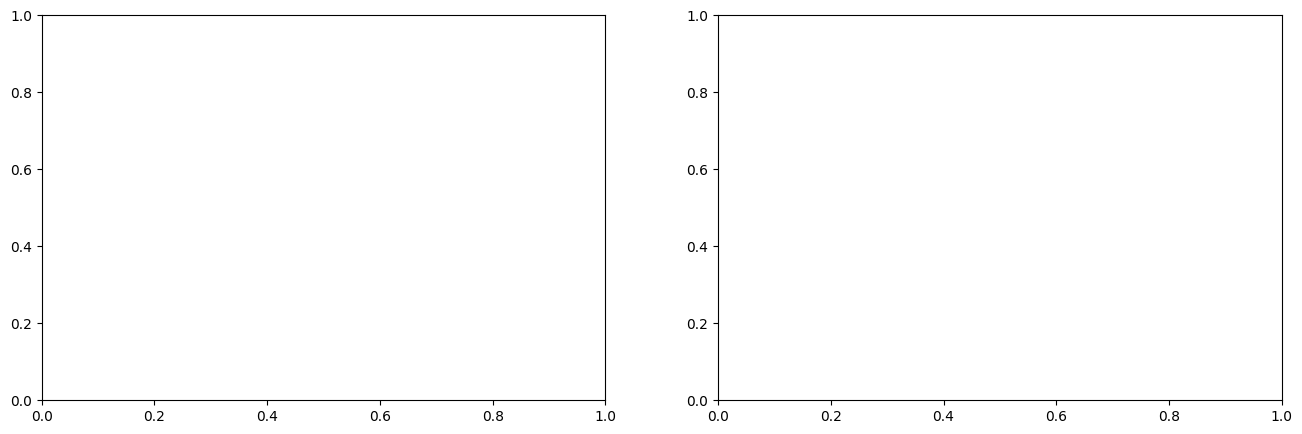

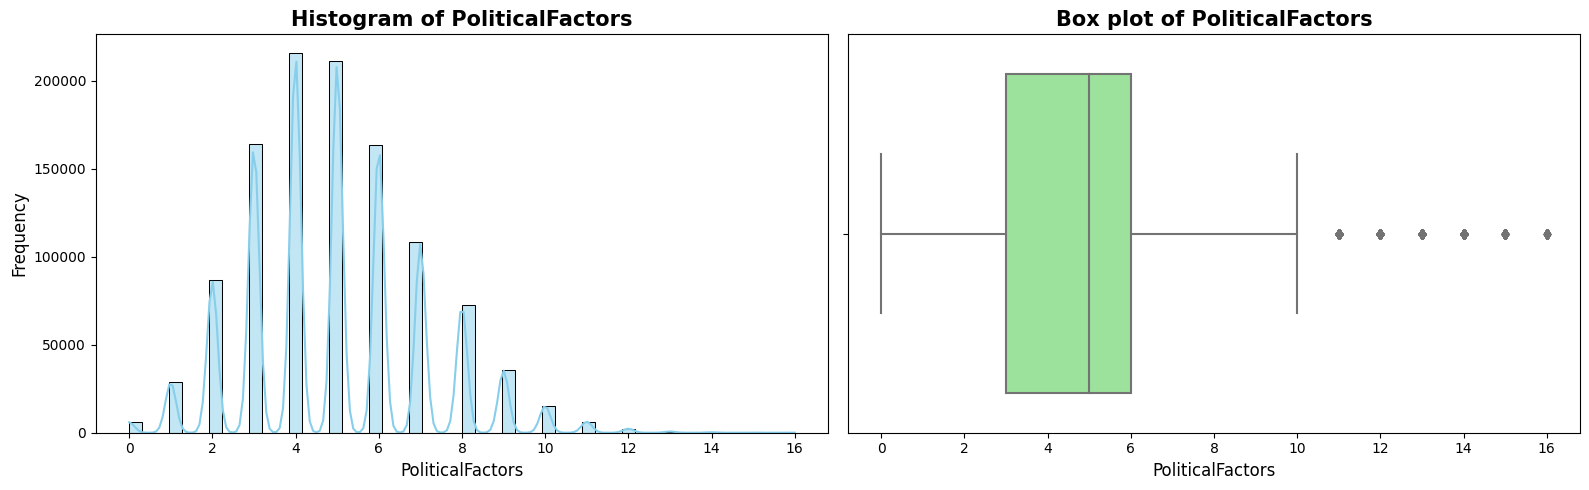

In [11]:
# Plot numeric values
num_cols=['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors']

plot_numerics(df_train[num_cols])

# Correlation matrix

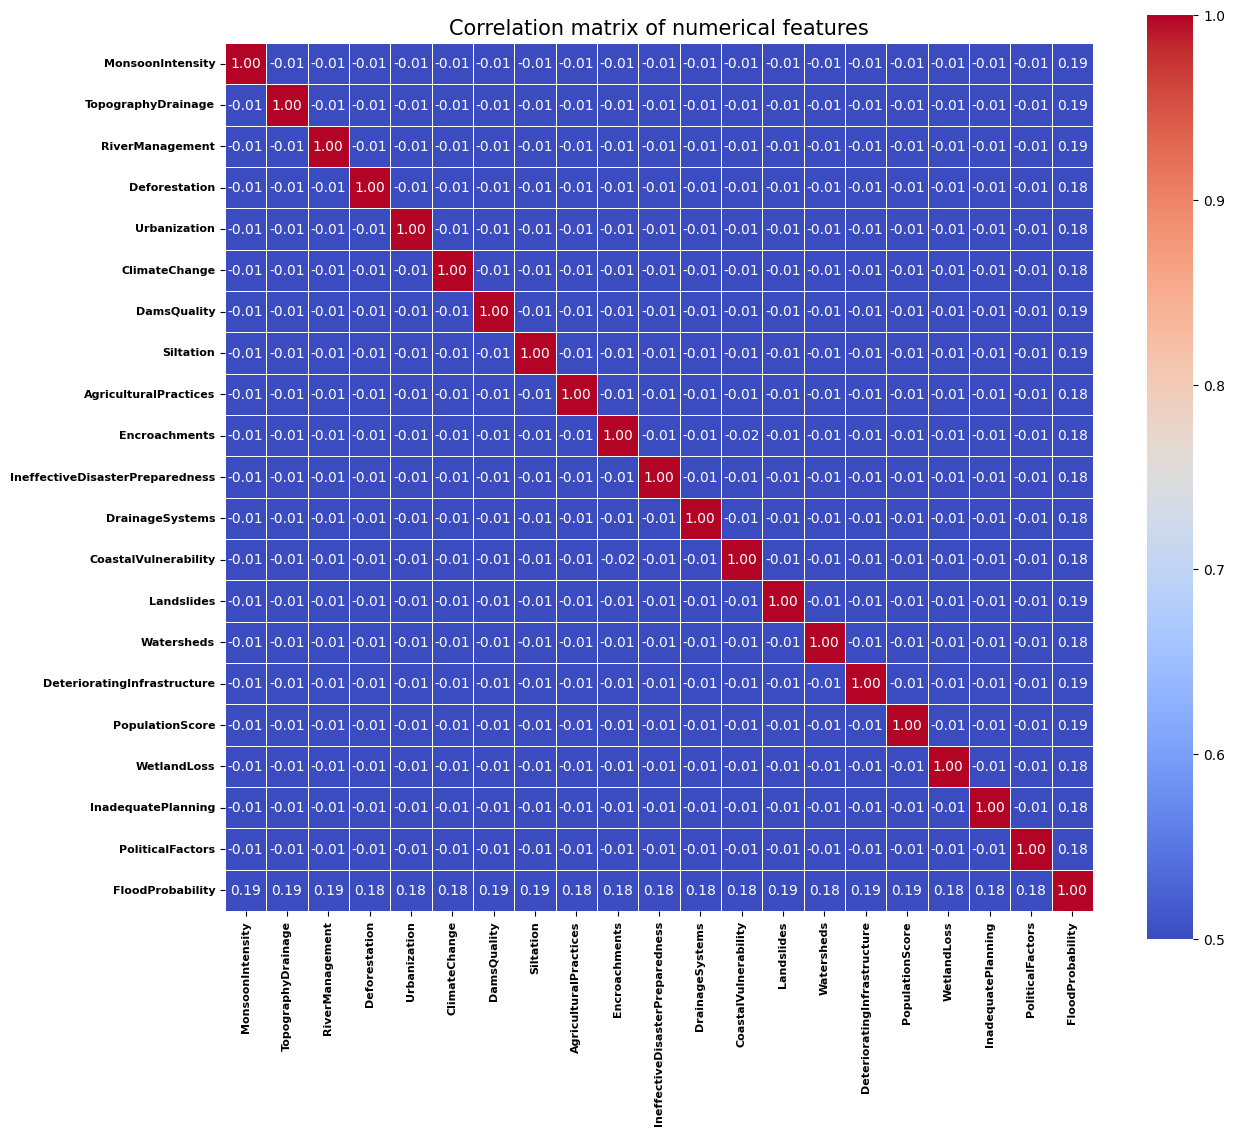

In [12]:
# Define correlation matrix functions
corr_matrix = df_train[num_cols + ['FloodProbability']].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, vmax=1, vmin=0.5, center=0.75, annot=True, fmt=".2f", square=True, linewidths=.5, cmap='coolwarm')

# Visualize the correlation matrix rate
plt.title('Correlation matrix of numerical features', fontsize=15)
plt.xticks(fontsize=8, fontweight='bold')
plt.yticks(fontsize=8, fontweight='bold')
plt.show()

# Feature engineering

In [13]:
unique_vals = []

for df in [df_train, df_test]:
    for col in num_cols:
        unique_vals += list(df[col].unique())

unique_vals = list(set(unique_vals))

def getFeats(df):
    scaler = StandardScaler()
    
    df['ClimateAnthropogenicInteraction'] = (df['MonsoonIntensity'] + df['ClimateChange']) * (df['Deforestation'] + df['Urbanization'] + df['AgriculturalPractices'] + df['Encroachments'])
    df['InfrastructurePreventionInteraction'] = (df['DamsQuality'] + df['DrainageSystems'] + df['DeterioratingInfrastructure']) * (df['RiverManagement'] + df['IneffectiveDisasterPreparedness'] + df['InadequatePlanning'])
    
    df['sum'] = df[num_cols].sum(axis=1)
    df['std']  = df[num_cols].std(axis=1)
    df['mean'] = df[num_cols].mean(axis=1)
    df['max']  = df[num_cols].max(axis=1)
    df['min']  = df[num_cols].min(axis=1)
    df['mode'] = df[num_cols].mode(axis=1)[0]
    df['median'] = df[num_cols].median(axis=1)
    df['q_25th'] = df[num_cols].quantile(0.25, axis=1)
    df['q_75th'] = df[num_cols].quantile(0.75, axis=1)
    df['skew'] = df[num_cols].skew(axis=1)
    df['kurt'] = df[num_cols].kurt(axis=1)
    df['sum_72_76'] = df['sum'].isin(np.arange(72, 76))
    
    for i in range(10, 100, 10):
        df[f'{i}th'] = df[num_cols].quantile(i/100, axis=1)
        df['harmonic'] = len(num_cols) / df[num_cols].apply(lambda x: (1/x).mean(), axis=1)
        df['geometric'] = df[num_cols].apply(lambda x: x.prod()**(1/len(x)), axis=1)
        df['zscore'] = df[num_cols].apply(lambda x: (x - x.mean()) / x.std(), axis=1).mean(axis=1)
        df['cv'] = df[num_cols].std(axis=1) / df[num_cols].mean(axis=1)
        df['Skewness_75'] = (df[num_cols].quantile(0.75, axis=1) - df[num_cols].mean(axis=1)) / df[num_cols].std(axis=1)
        df['Skewness_25'] = (df[num_cols].quantile(0.25, axis=1) - df[num_cols].mean(axis=1)) / df[num_cols].std(axis=1)
        df['2ndMoment'] = df[num_cols].apply(lambda x: (x**2).mean(), axis=1)
        df['3rdMoment'] = df[num_cols].apply(lambda x: (x**3).mean(), axis=1)
        df['entropy'] = df[num_cols].apply(lambda x: -1*(x*np.log(x)).sum(), axis=1)
    
    for v in unique_vals:
        if v < 16:
            df['cnt_{}'.format(v)] = (df[num_cols] == v).sum(axis=1)
    
    df[num_cols] = scaler.fit_transform(df[num_cols])
    
    return df

In [14]:
df_all = pd.concat([df_train, df_test], axis=0)

df_all.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [15]:
df_train.to_csv('/kaggle/working/train.csv', index=False)
df_test.to_csv('/kaggle/working/test.csv', index=False)

In [16]:
X=df_train.drop(['id','FloodProbability'], axis=1)
y=df_train['FloodProbability']

feats=list(X.columns)

# Feature importance

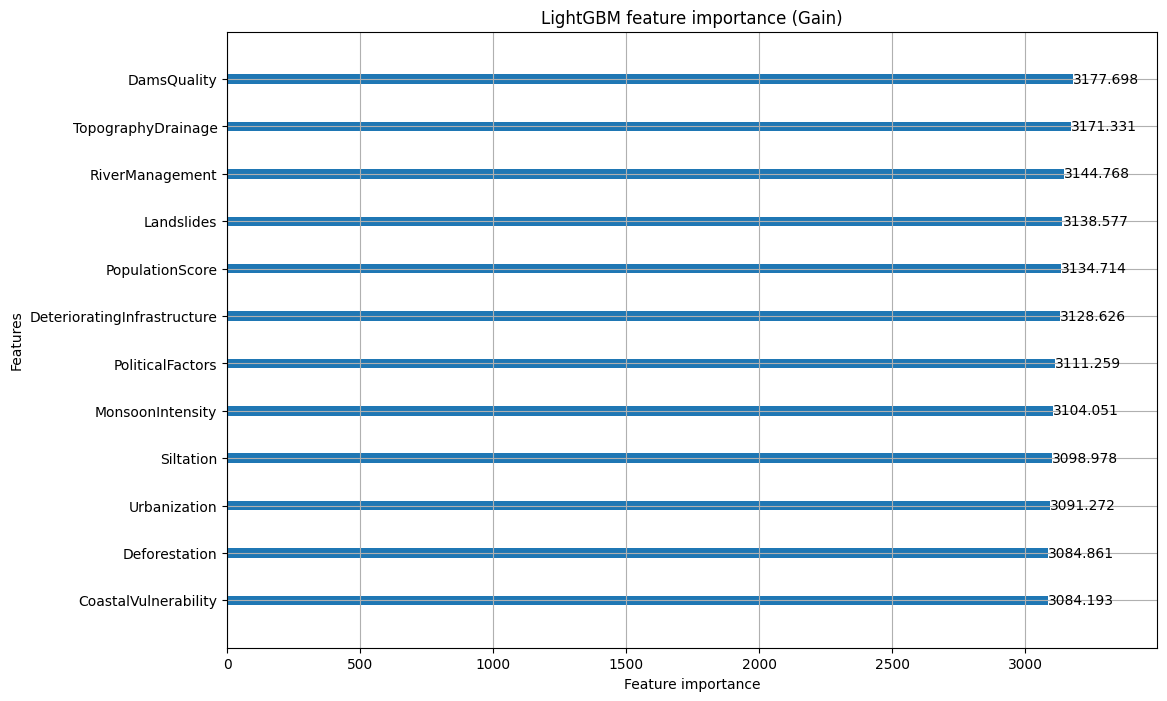

In [17]:
params = {
    'verbosity':-1,
    'n_estimators':550,
    'learning_rate':0.02,
    'num_leaves':250,
    'max_depth':10
}

LGB = lgb.LGBMRegressor(**params)
LGB.fit(X, y)

lgb.plot_importance(
    LGB,
    importance_type="gain",
    figsize=(12, 8),
    max_num_features=12,
    title="LightGBM feature importance (Gain)"
)

plt.show()

# Cross validation training

In [18]:
# Define cross validation training parameters
def cross_val_train(X, y, df_test, params):
    spl=5
    test_preds=np.zeros((len(df_test)))
    val_preds=np.zeros((len(X)))
    val_scores, train_scores = [], []
    cv=KFold(spl, shuffle=True, random_state=42)
    
    for fold, (train_ind, valid_ind) in enumerate(cv.split(X, y)):
        X_train = X.iloc[train_ind]
        y_train = y[train_ind]
        X_val = X.iloc[valid_ind]
        y_val = y[valid_ind]
        
        model = lgb.LGBMRegressor(
                                   boosting_type = 'gbdt', 
                                   n_estimators=2000, 
                                   learning_rate =  0.012, 
                                   device='gpu',
                                   num_leaves = 250, 
                                   subsample_for_bin= 165700, 
                                   min_child_samples= 114, 
                                   reg_alpha= 2.075e-06, 
                                   reg_lambda= 3.839e-07, 
                                   colsample_bytree= 0.9634,
                                   subsample= 0.9592, 
                                   max_depth= 10,
                                   random_state=0,
                                   verbosity=-1
                                 )
        
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_val, y_val)],
            callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(100)]
        )
        
        y_pred_trn=model.predict(X_train)
        y_pred_val=model.predict(X_val)
        train_r2 = r2_score(y_train, y_pred_trn)
        val_r2 = r2_score(y_val, y_pred_val)
        print("Fold:",fold, " Train R2:",np.round(train_r2,5), " Val R2:",np.round(val_r2,5))
        
        test_preds += model.predict(df_test[feats])/spl
        val_preds[valid_ind] = model.predict(X_val)
        val_scores.append(val_r2)
        print("-" * 50)
        
    return val_scores, val_preds, test_preds

In [19]:
# Cross validation rates
val_scores, val_preds, test_preds = cross_val_train(X, y, df_test, params)

1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's l2: 0.00170594
[200]	valid_0's l2: 0.00122044
[300]	valid_0's l2: 0.000936544
[400]	valid_0's l2: 0.00075963
[500]	valid_0's l2: 0.000645984
[600]	valid_0's l2: 0.000571415
[700]	valid_0's l2: 0.000521956
[800]	valid_0's l2: 0.000488854
[900]	valid_0's l2: 0.00046656
[1000]	valid_0's l2: 0.000451382
[1100]	valid_0's l2: 0.00044107
[1200]	valid_0's l2: 0.000433938
[1300]	valid_0's l2: 0.000429007
[1400]	valid_0's l2: 0.000425507
[1500]	valid_0's l2: 0.000423003
[1600]	valid_0's l2: 0.000421202
[1700]	valid_0's l2: 0.000419903
[1800]	valid_0's l2: 0.000418908
[1900]	valid_0's l2: 0.000418184
[2000]	valid_0's l2: 0.000417636
Did not meet early stopping. Best iteration is:
[2000]	valid_0's l2: 0.000417636
Fold: 0  Train R2: 0.86476  Val R2: 0.83933
--------------------------------------------------
Training until validation scores don't improve for 50 rounds
[100]	valid_0's l2: 0.00171429
[200]	valid_0's l2: 0.001

# Evaluate model

In [20]:
val_preds = np.zeros((len(X)))
mse = mean_squared_error(y, val_preds)
rmse = np.sqrt(mean_squared_error(y, val_preds))
r2 = r2_score(y, val_preds)

print(f'Mean-squared error: {mse}')
print(f'Root mean-squared error: {rmse}')
print(f'R2 score: {r2}')

Mean-squared error: 0.2571040577589299
Root mean-squared error: 0.5070542946854212
R2 score: -97.74716758482964


# Visualize residuals

In [21]:
# Calculate residuals
residuals = y - val_preds

print(residuals)

0          0.445
1          0.450
2          0.530
3          0.535
4          0.415
           ...  
1117952    0.495
1117953    0.480
1117954    0.485
1117955    0.495
1117956    0.560
Name: FloodProbability, Length: 1117957, dtype: float64


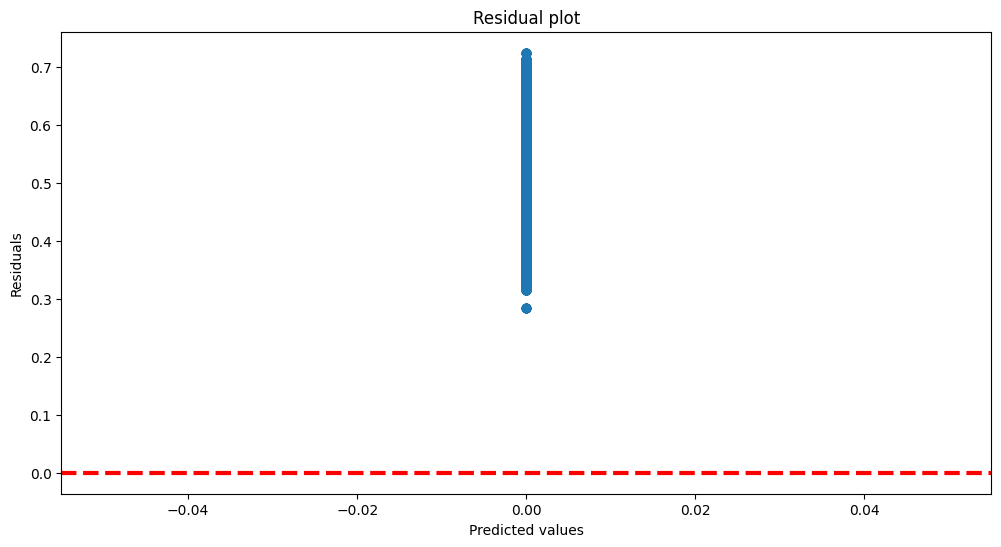

In [22]:
# Plot residuals
plt.figure(figsize=(12, 6))
plt.scatter(val_preds, residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=3)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

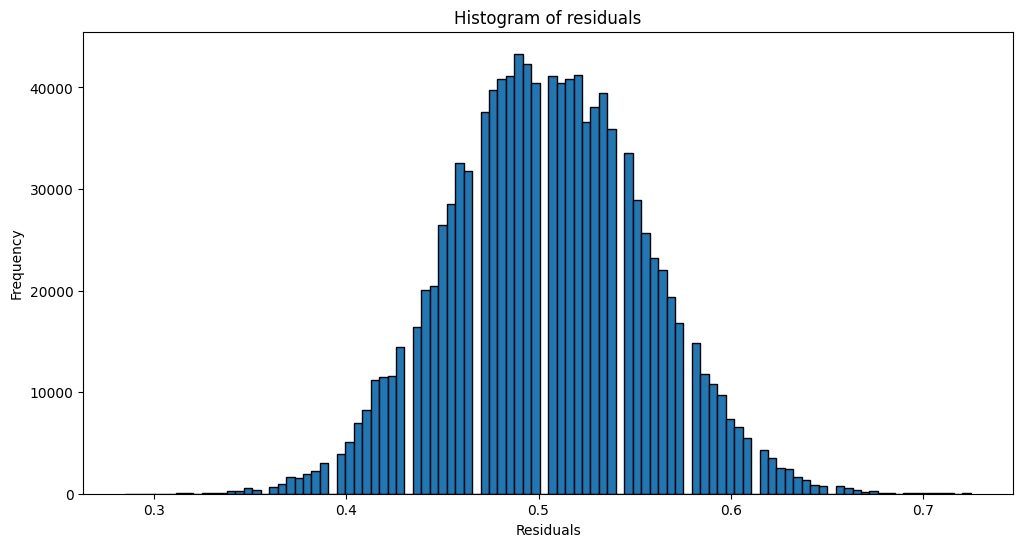

In [23]:
# Plot histogram of residuals
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=100, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of residuals')
plt.show()

# Generate submission

In [24]:
# Create a submission file
sub=sample_sub[['id']]
sub['FloodProbability'] = test_preds
sub.to_csv('submission.csv', index=False)

In [25]:
# Show first five rows of the submission
sub.head()

,id,FloodProbability
0,1117957,0.574689
1,1117958,0.456097
2,1117959,0.459249
3,1117960,0.465909
4,1117961,0.460648


In [26]:
# Notify if the file was saved successfully
print("Successfully saved as CSV file")

Successfully saved as CSV file
